In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('./datasets/train.csv')
data_test = pd.read_csv('./datasets/test.csv')
df = data.copy()
df_test = data_test.copy()
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print(f'Train dataset shape: {df.shape} \nTest  dataset shape: {data_test.shape}')

Train dataset shape: (891, 12) 
Test  dataset shape: (418, 11)


In [4]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum(), df_test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [7]:
df['Embarked'].mode()

0    S
dtype: object

In [8]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].value_counts(), df_test['Embarked'].value_counts()

(S    646
 C    168
 Q     77
 Name: Embarked, dtype: int64,
 S    270
 C    102
 Q     46
 Name: Embarked, dtype: int64)

In [9]:
df.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.514244
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [10]:
df_test[df_test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
df_test['Fare'] = df_test['Fare'].fillna('14.644083')

# Getting Titles as a new feature

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [14]:
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Capt              1
Sir               1
Don               1
the Countess      1
Ms                1
Mme               1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [15]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [16]:
df['Title'].unique()[4:]

array(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle',
       'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [17]:
rares = df['Title'].unique()[4:]
rares = rares.tolist()
rares.append('Dona')
rares

['Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [18]:
df['Title'] = df['Title'].apply(lambda x: x.replace(x, 'Rare') if x in rares else x)
df_test['Title'] = df_test['Title'].apply(lambda x: x.replace(x, 'Rare') if x in rares else x)

In [19]:
df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [20]:
df['Title'] = df['Title'].map({
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
})
df_test['Title'] = df_test['Title'].map({
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
})

In [224]:
df.groupby('Title')['Survived'].mean()

Title
1    0.156673
2    0.697802
3    0.792000
4    0.575000
5    0.444444
Name: Survived, dtype: float64

In [21]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
embarked_coded = {'S': 1,
                  'C': 2,
                  'Q': 3}

In [23]:
df['Embarked'] = df['Embarked'].map(embarked_coded)
df_test['Embarked'] = df_test['Embarked'].map(embarked_coded)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,1


## Filling Some Missing Values

In [25]:
mrAge = df[df['Title'] == 1]['Age'].mean()
missAge = df[df['Title'] == 2]['Age'].mean()
mrsAge = df[df['Title'] == 3]['Age'].mean()
masterAge = df[df['Title'] == 4]['Age'].mean()
rareWomenAge = df[(df['Title'] == 5) & (df['Sex'] == 'female')]['Age'].mean()
rareMenAge = df[(df['Title'] == 5) & (df['Sex'] == 'male')]['Age'].mean()

In [26]:
print(' Mr average age:', round(mrAge), '\n',
'Miss average age:', round(missAge), '\n',
'Mrs average age:', round(mrsAge), '\n',
'Master average age:', round(masterAge), '\n',
'Rare women average age:', round(rareWomenAge), '\n',
'Rare men average age:', round(rareMenAge))

 Mr average age: 32 
 Miss average age: 22 
 Mrs average age: 36 
 Master average age: 5 
 Rare women average age: 33 
 Rare men average age: 46


In [27]:
null_ages = df[df['Age'].isnull()]

In [28]:
null_test_ages = df_test[df_test['Age'].isnull()]

In [29]:
def fill_ages(title, sex):
    if title == 1:
        age = 32
    elif title == 2:
        age = 22
    elif title == 3:
        age = 36
    elif title == 4:
        age = 5
    elif (title == 5) & (sex == 'female'):
        age = 33
    elif (title == 5) & (sex == 'male'):
        age = 46
    return age

In [30]:
null_ages = null_ages.apply(lambda x: fill_ages(x['Title'], x['Sex']), axis = 1)

In [31]:
null_test_ages = null_test_ages.apply(lambda x: fill_ages(x['Title'], x['Sex']), axis = 1)

In [32]:
df['Age'].fillna(null_ages, inplace = True)

In [33]:
df_test['Age'].fillna(null_test_ages, inplace = True)

In [34]:
df.groupby(['Title', 'Sex'])['Age'].mean()

Title  Sex   
1      male      32.283366
2      female    21.818681
3      female    35.912000
4      male       4.616750
5      female    32.857143
       male      45.900000
Name: Age, dtype: float64

### Dropping unnecessary columns

In [35]:
df = df.drop(['Cabin'], axis=1)
df = df.drop(['Ticket'], axis=1)
df = df.drop(['Name'], axis = 1)

In [36]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.25,1,1


In [37]:
df_test = df_test.drop(['Cabin', 'Ticket'], axis = 1)

In [38]:
df_test = df_test.drop('Name', axis = 1)

In [39]:
gender_encoding = {'male': 0,
                   'female': 1}
df['Sex'] = df['Sex'].map(gender_encoding)
df_test['Sex'] = df_test['Sex'].map(gender_encoding)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,3
2,3,1,3,1,26.0,0,0,7.9250,1,2
3,4,1,1,1,35.0,1,0,53.1000,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,1


In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,1,1,2
1,2,1,1,1,38.0,1,0,71.2833,2,3,2
2,3,1,3,1,26.0,0,0,7.9250,1,2,1
3,4,1,1,1,35.0,1,0,53.1000,1,3,2
4,5,0,3,0,35.0,0,0,8.0500,1,1,1


In [42]:
family_size = df.groupby('FamilySize')['Survived'].mean()*100
family_size

FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [46]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,1,1,2
1,2,1,1,1,38.0,1,0,71.2833,2,3,2
2,3,1,3,1,26.0,0,0,7.9250,1,2,1
3,4,1,1,1,35.0,1,0,53.1000,1,3,2
4,5,0,3,0,35.0,0,0,8.0500,1,1,1


In [47]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,0,34.5,0,0,7.8292,3,1,1
1,893,3,1,47.0,1,0,7,1,3,2
2,894,2,0,62.0,0,0,9.6875,3,1,1
3,895,3,0,27.0,0,0,8.6625,1,1,1
4,896,3,1,22.0,1,1,12.2875,1,3,3


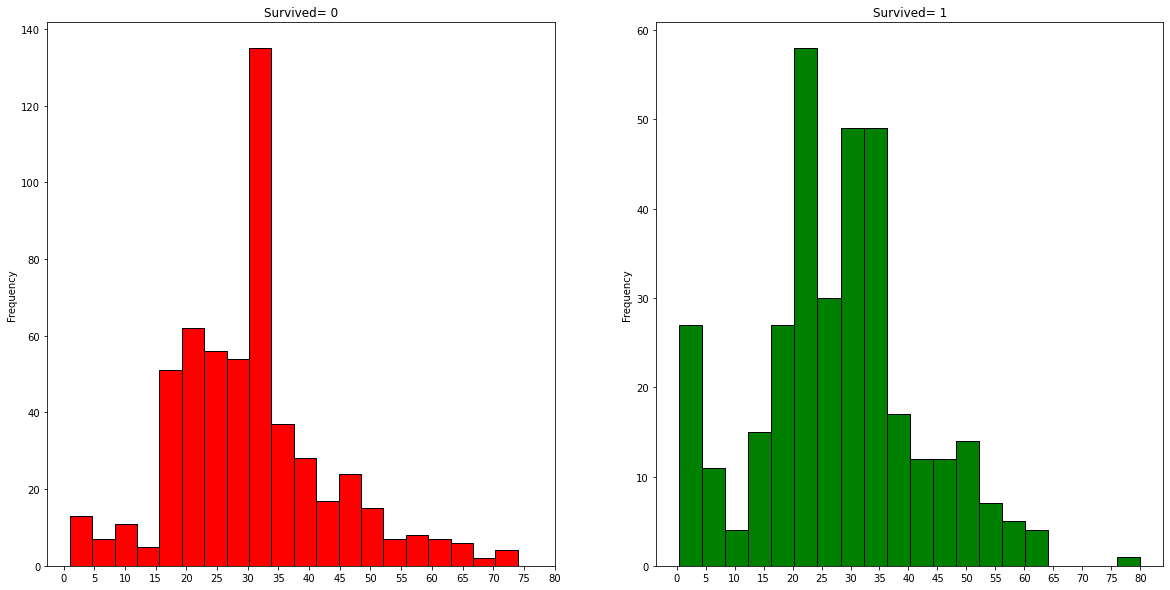

In [50]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(20,10))

df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')

ax[0].set_title('Survived= 0')

x1=list(range(0,85,5))

ax[0].set_xticks(x1)

df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')

ax[1].set_title('Survived= 1')

x2=list(range(0,85,5))

ax[1].set_xticks(x2)

plt.show()

# Modelling

In [61]:
y = df['Survived']
X = df.drop(['Survived', 'PassengerId', 'SibSp', 'Parch'], axis = 1)

In [62]:
X_test = df_test.drop(['PassengerId','SibSp','Parch'], axis = 1)
y_test = pd.read_csv('datasets/gender_submission.csv')
y_test = y_test.drop('PassengerId', axis = 1)

### Random Forest -Classification-

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [114]:
rfModel = RandomForestClassifier()
rfModel = rfModel.fit(X, y)

In [115]:
rfModel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [116]:
rfModel.predict(X_test)[:8]

array([0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [117]:
y_pred = rfModel.predict(X_test)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8205741626794258

In [119]:
y_pred[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

## Model Tuning

In [97]:
rf_params = {'max_depth': [2,5,8,10],
             'max_features': [2, 5, 8],
             'n_estimators': [10, 500, 1000],
             'min_samples_split': [2,5,10]
            }

In [98]:
rf_model = RandomForestClassifier()

In [100]:
rf_cv_model = GridSearchCV(rf_model,
                     rf_params,
                     cv = 10,
                     n_jobs = -1,
                     verbose = 2)

In [101]:
rf_cv_model.fit(X, y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.3min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [102]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [103]:
best_parameters = {
    'max_depth': 10,
    'max_features': 5,
    'min_samples_split': 10,
    'n_estimators': 1000
}

In [121]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 5,
                                  min_samples_split = 10,
                                  n_estimators = 1000)

In [122]:
rf_tuned.fit(X,y)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=10,
                       n_estimators=1000)

In [126]:
y_pred = rf_tuned.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred)

0.868421052631579

## Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtModel = DecisionTreeClassifier()

In [134]:
dtModel.fit(X, y)

DecisionTreeClassifier()

In [136]:
y_pred = dtModel.predict(X_test)

In [137]:
accuracy_score(y_test, y_pred)

0.8038277511961722

## Model Tuning

In [142]:
dt_model = DecisionTreeClassifier()

In [161]:
dt_params = {'criterion': ['gini', 'entropy'],
             'max_depth': list(range(2,11,2)),
             'min_samples_split': list(range(1,10,2)),
             'min_samples_leaf': list(range(1,10))
            }

In [162]:
dt_cv_model = GridSearchCV(dt_model,
                           dt_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
dt_cv_model.fit(X, y)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   10.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 3, 5, 7, 9]},
             verbose=2)

In [163]:
dt_cv_model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [164]:
dt_tuned = DecisionTreeClassifier(max_depth = 4,
                                  min_samples_leaf = 1,
                                  min_samples_split = 3)
dt_tuned.fit(X, y)

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [165]:
y_pred = dt_tuned.predict(X_test)

In [166]:
accuracy_score(y_test, y_pred)

0.9282296650717703

## AdaBoost -Classification-

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [168]:
abModel = AdaBoostClassifier()

In [169]:
abModel.fit(X, y)

AdaBoostClassifier()

In [171]:
y_pred = abModel.predict(X_test)
accuracy_score(y_test, y_pred)

0.9066985645933014

### Model Tuning

In [173]:
ab_model = AdaBoostClassifier()

In [180]:
ab_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [174]:
ab_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}

In [175]:
ab_cv_model = GridSearchCV(ab_model,
                           ab_params,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
ab_cv_model.fit(X, y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   31.6s finished


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [176]:
ab_cv_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [178]:
ab_tuned = AdaBoostClassifier(learning_rate = 0.1,
                              n_estimators = 200)
ab_tuned.fit(X, y)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [179]:
y_pred = ab_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9330143540669856

## MLP

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler = StandardScaler()

In [186]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [187]:
X_scaled

array([[ 0.82737724, -0.73769513, -0.58254075, ..., -0.56883712,
        -0.70446995,  0.05915988],
       [-1.56610693,  1.35557354,  0.62433264, ...,  1.00518113,
         1.19759892,  0.05915988],
       [ 0.82737724,  1.35557354, -0.28082241, ..., -0.56883712,
         0.24656448, -0.56097483],
       ...,
       [ 0.82737724,  1.35557354, -0.58254075, ..., -0.56883712,
         0.24656448,  1.29942929],
       [-1.56610693, -0.73769513, -0.28082241, ...,  1.00518113,
        -0.70446995, -0.56097483],
       [ 0.82737724, -0.73769513,  0.17175512, ...,  2.57919938,
        -0.70446995, -0.56097483]])

In [188]:
from sklearn.neural_network import MLPClassifier

In [193]:
mlpcModel = MLPClassifier().fit(X, y)

In [194]:
mlpcModel.coefs_

[array([[ 2.88432718e-01,  2.43291452e-07,  1.33245308e-01,
          2.06478212e-01, -2.52678096e-01,  2.79933667e-01,
         -1.33323632e-01,  6.96419578e-02,  6.93834015e-02,
          4.72850207e-03, -8.39860789e-03, -9.59595764e-02,
         -5.25816609e-02,  1.60768599e-01, -6.39473075e-02,
         -1.03712460e-01, -1.27317738e-01,  1.58946741e-02,
          1.66644440e-04,  3.96967836e-02,  1.88703268e-02,
         -2.37066280e-01, -8.12525699e-02, -8.09488713e-02,
          3.03508525e-02,  2.33312412e-02, -5.84526039e-02,
         -1.97866207e-01, -1.17725743e-02,  6.40222908e-02,
         -3.83041102e-06, -1.58308643e-01,  1.10783067e-01,
         -3.98174587e-02, -2.22086276e-01,  1.11866790e-01,
          2.59082928e-02, -2.82950194e-01, -2.56959418e-01,
         -2.46581995e-01,  4.09149405e-02, -1.51032680e-02,
          3.01098010e-10, -2.71725929e-01,  7.52555150e-02,
         -1.12136930e-01,  5.95537129e-02,  4.63890397e-02,
          1.47953915e-01, -1.02631818e-0

In [195]:
y_pred = mlpcModel.predict(X_test)
accuracy_score(y_test, y_pred)

0.868421052631579

## Model Tuning

In [197]:
mlpc_model = MLPClassifier()

In [198]:
mlpc_params = {'hidden_layer_sizes': [(10, 10, 10),
                                      (100, 100, 100),
                                      (100), (100),
                                      (3, 5),
                                      (5, 3)],
               'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
               'solver': ['lbfgs', 'sgd', 'adam'],
               'activation': ['relu', 'logistic']}

In [199]:
mlpc_cv_model = GridSearchCV(mlpc_model,
                             mlpc_params,
                             cv = 10,
                             n_jobs = -1,
                             verbose = 2)
mlpc_cv_model.fit(X, y)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 10.5min finished
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                100, 100, (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [200]:
mlpc_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.1,
 'hidden_layer_sizes': (5, 3),
 'solver': 'lbfgs'}

In [202]:
mlpc_tuned = MLPClassifier(activation = 'logistic',
                           alpha = 0.1,
                           hidden_layer_sizes = (5,3),
                           solver = 'lbfgs')
mlpc_tuned.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(5, 3),
              solver='lbfgs')

In [203]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8851674641148325

# Models Comparison

In [223]:
models = [rf_tuned, dt_tuned ,ab_tuned, mlpc_tuned]

for model in models:
    name = model.__class__.__name__
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('-'*40)
    print(name, ':')
    print(f'Model Accuracy Score = %{round(score*100,2)}')

----------------------------------------
RandomForestClassifier :
Model Accuracy Score = %86.84
----------------------------------------
DecisionTreeClassifier :
Model Accuracy Score = %92.82
----------------------------------------
AdaBoostClassifier :
Model Accuracy Score = %93.3
----------------------------------------
MLPClassifier :
Model Accuracy Score = %88.52
